## From YouTube

In [22]:
import dowhy
from dowhy import CausalModel
import numpy as np
import pandas as pd

In [24]:
df = pd.read_pickle("df_propensity_score.p")
df.head()

,age,hours-per-week,hasGraduateDegree,inRelationship,isWhite,isFemale,greaterThan50k
0,39,40,0,0,1,0,0
1,50,13,0,1,1,0,0
2,38,40,0,0,1,0,0
3,53,40,0,1,0,0,0
5,37,40,1,0,1,1,0


In [28]:
# Define the causal model
model = CausalModel(
            data = df,
            treatment = "hasGraduateDegree",
            outcome = "greaterThan50k",
            common_causes = "age")

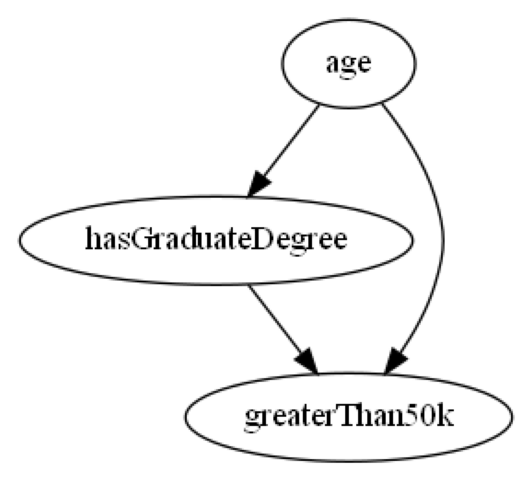

In [30]:
# View model
model.view_model()

In [32]:
# Compute causal effect ising 3 different propensity score-based approaches

identified_estimand_experiment = model.identify_effect(proceed_when_unidentifiable=True)

# create list of names of the propensity score methods to use
ps_method_name_list = ["matching", "stratification","weighting"]

#initialize the dictionary to store estimates from each method and list to store ATEs
ps_estimate_dict={}
ps_estimate_val_list=[]

for ps_method_name in ps_method_name_list:
    ps_estimate = model.estimate_effect(identified_estimand_experiment,
                                       method_name="backdoor.propensity_score_"+ ps_method_name,
                                       confidence_intervals=False,
                                       method_params={})
    # add estimate to dict and ATE list
    ps_estimate_dict[ps_method_name] = ps_estimate
    ps_estimate_val_list.append(ps_estimate.value)
    
    print(ps_estimate)
    print("\n")

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduateDegree,age,U) = P(greaterThan50k|hasGraduateDegree,age)

## Realized estimand
b: greaterThan50k~hasGraduateDegree+age
Target units: ate

## Estimate
Mean value: 0.1676722660267398



*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
         d                                 
────────────────────(E[greaterThan50k|age])
d[hasGraduateDegree]                       
Estimand assumption 1, Unconfoundedness: If U→{hasGraduateDegree} and U→greaterThan50k then P(greaterThan50k|hasGraduat

In [33]:
ps_estimate_dict

{'matching': <dowhy.causal_estimator.CausalEstimate at 0x176acbf3350>,
 'stratification': <dowhy.causal_estimator.CausalEstimate at 0x176b09bc650>,
 'weighting': <dowhy.causal_estimator.CausalEstimate at 0x176b09bd410>}

In [34]:
ps_estimate_val_list

In [36]:
ps_estimate_val_list.shape

AttributeError: 'list' object has no attribute 'shape'

In [37]:
df = pd.DataFrame(ps_estimate_val_list)

In [39]:
# ATE of Grad School on Income
# Going to grad school will increase the probability someone makes more than 50k by 24%

df.sum()/df.count()

0    0.24966
dtype: float64